Sample code for AIRI400 Perceptron class. The original code comes from Sebastian Reschka's blog (http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html).<br/>
Slightly modified for the lecture. -skimaza

In [1]:
import numpy as np
import pandas as pd
import os
from urllib.request import urlopen

IRIS_DATA = "iris.dat"
if not os.path.exists(IRIS_DATA):
    raw = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data').read()
    with open(IRIS_DATA, "wb") as f:
        f.write(raw)

In [2]:
weights = []
errors_log = []
epochs = 50
eta = 0.01

cost_log = []

In [3]:
df = pd.read_csv(IRIS_DATA, header=None)

In [4]:
def AGD_train(X, y, epochs=epochs, eta=eta):
    global weights
    global errors_log
    global cost_log
    weights = np.zeros(1 + X.shape[1])
    print("Initial weights", weights)
    errors_log = []
    cost_log = []

    for i in range(epochs):
        output = net_input(X)
        errors = (y - output)
        print("Epoch {:3d}\nOUTPUT\n{}\nERRORS\n{}".format(i, output, errors))
        weights[1:] += eta * X.T.dot(errors)
        weights[0] += eta * errors.sum()
        print("Updated WEIGHTS\n{}".format(weights))
        cost = (errors**2).sum() / 2.0
        cost_log.append(cost)
    return

def net_input(X):
    global weights
    return np.dot(X, weights[1:]) + weights[0]

def AGD_activation(X):
    return net_input(X)

def AGD_predict(X):
    return np.where(AGD_activation(X) >= 0.0, 1, -1)

In [5]:
# setosa and versicolor
y = np.asarray(df.iloc[0:100, 4].values)
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = np.asarray(df.iloc[0:100, [0,2]].values)

In [6]:
# standardize features
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [7]:
pos = X_std[[y == 1]]
neg = X_std[[y == -1]]

In [8]:
AGD_train(X_std, y, epochs=15, eta=0.01)

Initial weights [ 0.  0.  0.]
Epoch   0
OUTPUT
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ERRORS
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
Updated WEIGHTS
[ 0.          0.72829015  0.96995527]
Epoch   1
OUTPUT
[-1.40706793 -1.63519978 -1.93062871 -1.91010046 -1.52113386 

In [9]:
min_x = min(X_std[:,0])
max_x = max(X_std[:,0])
print(min_x, max_x)

-1.83403820254 2.39474330631


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

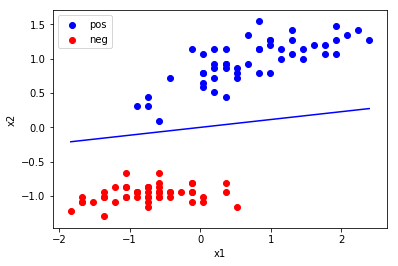

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

point_x = np.array([min_x, max_x])
point_y = np.array([- (weights[0]+weights[1]*min_x)/weights[2], - (weights[0]+weights[1]*max_x)/weights[2]])

line, = ax.plot(point_x, point_y, 'b-', picker=5)

ax.scatter(pos[:,0], pos[:, 1], color='blue', label="pos")
ax.scatter(neg[:,0], neg[:, 1], color='red', label="neg")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=2, scatterpoints=1, fontsize=10)

plt.show()

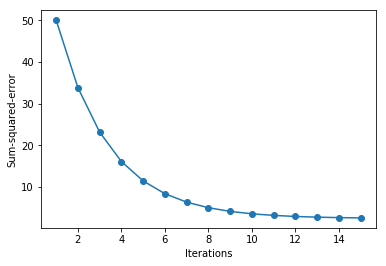

In [12]:
plt.plot(range(1, len(cost_log)+1), cost_log, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
#plt.title('Adaline - Learning rate 0.0001')
plt.show()